# A Simplified Introduction to tensorflow and keras

The following code was effectively sourced here: https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/. This link also contains an introduction to tensorflow and keras. The purpose of the following introduction is to pick out the discussions most pertinent to practical use of image-based machine learning and to provide more detailed explanations of specific elements of code.

# A Quick 1-D Example

The first step in using machine learning modules is to define an input. Ideally an input has meaning, but it is easiest to start with short, easily manipulated code with clear patterns. Such an input is printed below. It contains binary data that should be relatively easy to sort and a bump in the form of of two ones in the middle. It is important to recognize that the input data has been reshaped to size (1, 8, 1). The three dimensions are channels, rows, and columns. The simplified input only has one channel as it is binary, but when evaluating actual images and especially color images, this dimension can be used to interpret color data.

Also helpful to notice are the imports used. Essentially, tensorflow and keras are almost all that is necessary, but it may be useful to import functions of keras separately to increase ease of writing. It is also helpful to import numpy's asarray function because most of the tensorflow/keras functions work best with arrays.

In [83]:
#code sourced at https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import asarray
# define input data
#filters are most often binary and multi-dimensional, their contents are simple, overall patterns are complex
data = asarray([1, 0, 0, 1, 1, 0, 0, 0])#something that can be sorted
data = data.reshape(1, 8, 1)# need model to expect size of data (1, 8, 1)
data


array([[[1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0]]])

Now that the input is known, a model can be built to expect it. Sequential is a way of forming a model that can be built upon layer by layer after which it can provide information on the input. Here, just one layer is added that expects 1 channel, a filter with 3 values, and an input of shape (8, 1).

In [84]:
# create model
model = keras.Sequential()
model.add(layers.Conv1D(1, 3, input_shape=(8, 1)))#Conv1D refers to 1D nature of data, no RBG, multiple channels #1, 3 => filter shape (always smaller than input)

The weights that essentially serve as a filter are defined below. The 010 array acts as the actual filter. When applied to the model, it is multiplied against the input resulting in the detection of bumps in the data. The weights must also be set and retrieved.

In [85]:
#weights on filter are automatically random, for a very small data set you need specific weights, here looking for a bump in values 0=>1=>0
# define a detector for bumps in values
weights = [asarray([[[0]],[[1]],[[0]]]), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
print(model.get_weights())

[array([[[0.]],

       [[1.]],

       [[0.]]], dtype=float32), array([0.], dtype=float32)]


Finally, a result can be found. The result is a prediction of the pattern of data filtered by the weights which represent the desired features. Here, the original data is predicted because it only has one possible feature. Note that the prediction's number of rows is reduced by two. This comes from the fact that the weights are applied in such a way that they fit within the data. With overlap, three numbers can be multiplied six times against a dataset of eight numbers when going in sequence.

Essentially, the results come from the following calculations:

$$
row 1: 0*1+1*0+0*0=0
$$
$$
row 2: 0*0+1*0+0*1=0
$$
$$
row 3: 0*0+1*1+0*1=1
$$
$$
row 4: 0*1+1*1+0*0=1
$$
$$
row 5: 0*1+1*0+0*0=0
$$
$$
row 6: 0*0+1*0+0*0=0
$$

Because of this method and this filter, any data on the edges is ignored. With a sizable amount of data, this should not be a big problem. Even so, to potentially apply more filters, this issue would ideally be eliminated.

In [86]:

# apply filter to input data
yhat = model.predict(data)
print(yhat)#end result comes from multiplying 010 on every sequential set of three, effectively shortens output by 2 zeroes

[[[0.]
  [0.]
  [1.]
  [1.]
  [0.]
  [0.]]]


# A 2-D Example with Images

The same principles can be applied two two-dimensional arrays of input. To make the results more interesting, the two-dimensional example is applied to an image file here. To ensure that the binary-based code works, the image file must be converted to a binary black and white file. The image data is transformed to an array and the shape is checked as it will be needed when adding layers to the model. Note that this image was chosen for its periodic vertical and horizontal lines. These will make it easy to check if simple filters work.

True Original


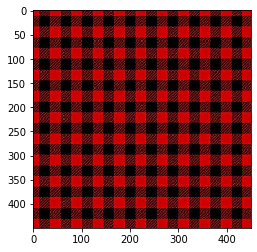

Binary Original


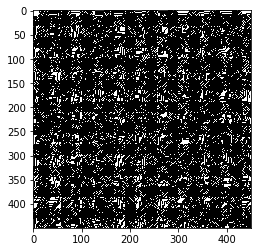

Shape: (450, 450)


In [89]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

image = Image.open('plaid.jpg')
print('True Original')
plt.imshow(image)
plt.show()
image = image.convert('1')
print('Binary Original')
plt.imshow(image)
plt.show()
transform = np.asarray(image)
#show image in black and white
print('Shape:', transform.shape)

The image has to be reshaped but in four dimensions. Note that the image is definitely binary as evidenced by the fatc that the image data compromises of True and False values.

In [80]:
transform = transform.reshape(1, 450, 450, 1)
transform

array([[[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [ True],
         [False],
         ...,
         [False],
         [ True],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        ...,

        [[False],
         [False],
         [False],
         ...,
         [ True],
         [False],
         [ True]],

        [[False],
         [ True],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [ True],
         [False]]]])

The model and weight creation in 2-D is very similar to what was done in 1-D. The layers function used is Conv2D rather than Conv1D and it takes two-dimensional shapes rather than one-dimensional shapes. The weight used as a filter is expanded to a 3x3 grid to find continuous vertical lines.

In [81]:

# create model
model = keras.Sequential()
model.add(layers.Conv2D(1, (3,3), input_shape=(450, 450, 1)))

# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [np.asarray(detector), np.asarray([0.0])]# np.asarray(detector), np.asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# confirm they were stored
print(model.get_weights())

[array([[[[0.]],

        [[0.]],

        [[0.]]],


       [[[1.]],

        [[1.]],

        [[1.]]],


       [[[0.]],

        [[0.]],

        [[0.]]]], dtype=float32), array([0.], dtype=float32)]


Now the prediction is made and the results can be plotted by reshaping the image data to two-dimensional shapes. Note that the prediction is 2 entries shorter in both dimensions. Luckily this will not distort the comparison enough to be noticeable because of the large datasets.

Prediction


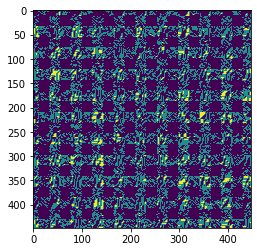

Original


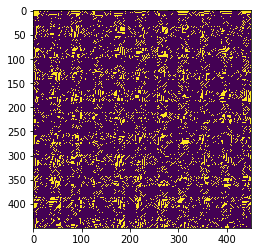

[[1. 2. 1. ... 1. 2. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 2. 1. ... 1. 2. 1.]
 ...
 [1. 1. 0. ... 1. 0. 0.]
 [0. 1. 1. ... 1. 1. 2.]
 [1. 1. 0. ... 1. 0. 0.]]
[[False False False ... False False False]
 [False  True False ... False  True False]
 [False False False ... False False False]
 ...
 [False False False ...  True False  True]
 [False  True False ... False False False]
 [False False False ... False  True False]]


In [82]:
# apply filter to input data

yhat = model.predict(transform)
yhat = yhat.reshape(448, 448)
print('Prediction')
plt.imshow(yhat)
plt.show()
transform = transform.reshape(450, 450)
print('Original')
plt.imshow(transform)
plt.show()
print(yhat)
print(transform)

Looking at the results, it is clear that the filter provided a fairly good predictor of vertical lines and really the original image overall. The only place where information is missing is columns lacking dark squares (only grey squares are present). In the light squares in these columns, patches of yellow remain. This can actually be removed by changing the filter to a cross of ones or reversed so that it only occurs in rows lacking dark squares by changing the filter to a horizontal line of ones.

# Next Steps

* Work on getting multiple channels working
* Look at other/all types of layers
* Work on trainable models

# Sources to Consider

* https://keras.io/api/models/sequential/
* https://keras.io/api/layers/convolution_layers/convolution1d/